In [1]:
# change present working directory to project directory
import os
os.chdir("../")

In [2]:
import pickle
import torch
import torch.nn as nn

#import os
#print(os.getcwd())

from data_preprocessing.custom_datasets import Dataset_3DCNN, collate_fn
import torch.utils.data as data
from models.text_model import Text_Model
from training.evaluation import evalMetric, plot_all_metrics, save_results
from training.train_vision import train, validation
from training.test_model import test_model
from utils.utils import load_config, fix_the_random
import warnings
warnings.filterwarnings('ignore')

In [3]:
model_name = "Bert_unimodal"

config = load_config('configs/configs.yaml')
fix_the_random(2021)

with open(config["PICKLE_FOLDER"]+'allFoldDetails.p', 'rb') as fp:
    allDataAnnotation = pickle.load(fp)

model_cls = Text_Model

dataset_cls = Dataset_3DCNN


In [4]:
performance_by_epoch, best_mean_metrics, best_std_metrics = test_model(
                                                                model_cls=model_cls,
                                                                dataset_cls=dataset_cls,
                                                                epochs=config["EPOCHS"],
                                                                optimizer_name="Adam",
                                                                allDataAnnotation=allDataAnnotation

                                                           )

100%|██████████| 5/5 [00:11<00:00,  2.27s/it]


In [6]:
with open(config["PICKLE_FOLDER"] + f"{model_name}_scores.p", "wb") as f:
    pickle.dump((performance_by_epoch, best_mean_metrics, best_std_metrics), f)

## Model Evaluation

In [7]:
with open(config["PICKLE_FOLDER"] + f"{model_name}_scores.p", "rb") as f:
    performance_by_epoch, best_mean_metrics, best_std_metrics = pickle.load(f)

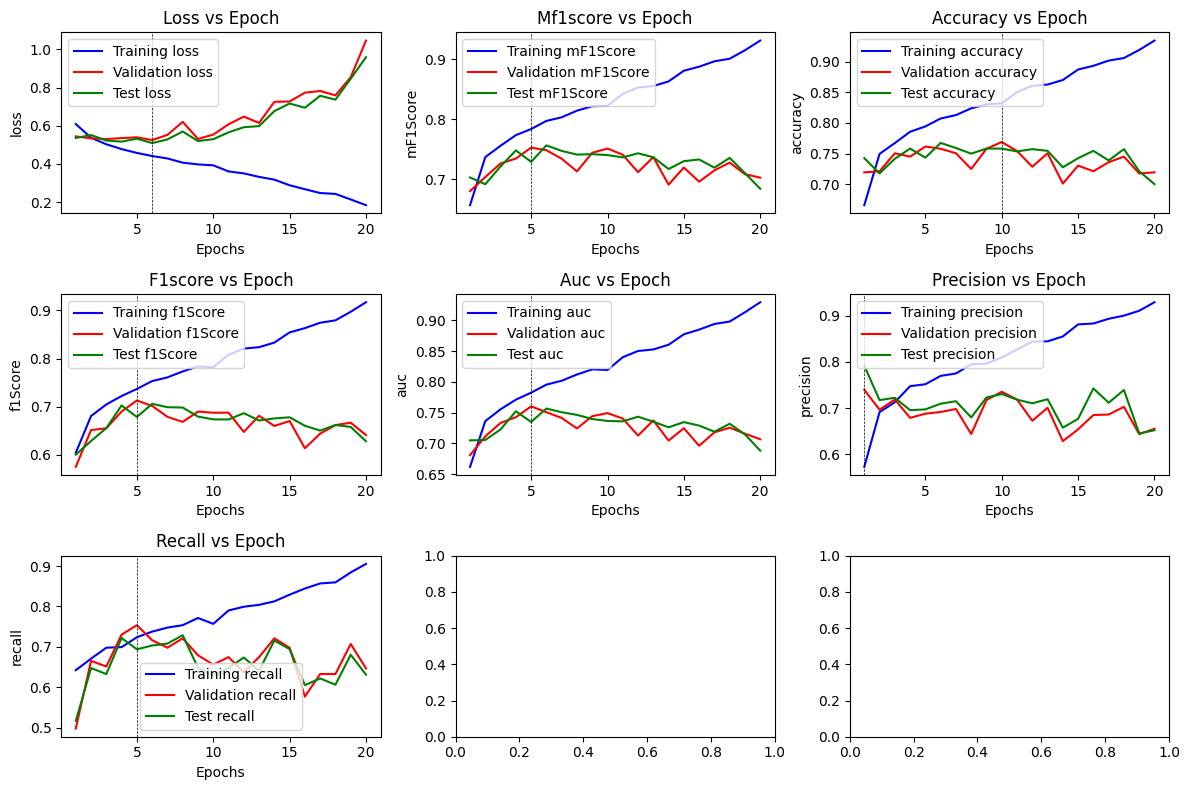

In [5]:
plot_all_metrics(performance_by_epoch)

In [8]:
name_of_entry = "BERT+3FCL"
save_results(performance_by_epoch, name_of_entry)

Results saved successfully!


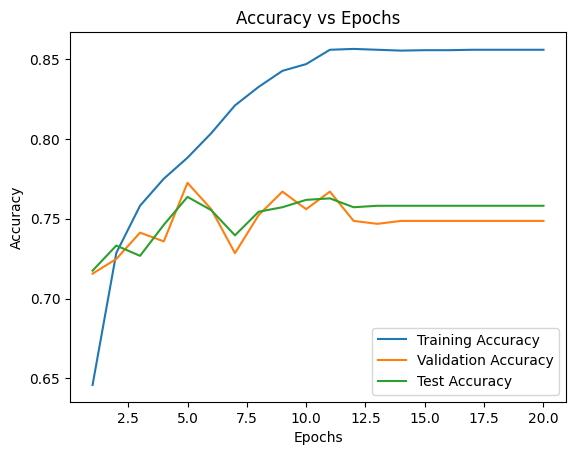

In [9]:
from training.evaluation import get_metric_by_epoch
import matplotlib.pyplot as plt

training_accuracy = get_metric_by_epoch("accuracy", "epoch_train_scores", performance_by_epoch)
val_accuracy = get_metric_by_epoch("accuracy", "epoch_val_scores", performance_by_epoch)
test_accuracy = get_metric_by_epoch("accuracy", "epoch_test_scores", performance_by_epoch)

epochs = range(1, len(training_accuracy)+1)

plt.plot(epochs, training_accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.plot(epochs, test_accuracy, label='Test Accuracy')

# Adding labels and title
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epochs')

# Adding legend
plt.legend()

# Display plot
plt.show()
